Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import missingno as msno
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
from sklearn.metrics import roc_curve

Read Dataset

In [3]:
df = pd.read_csv('dementia_dataset.csv')
pd.set_option('display.max_columns', None)
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Overview of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Summary statistics of the Dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


Find Missing Values

In [6]:
missing_percent = df.isnull().sum() * 100 / len(df)
missing_count = df.isnull().sum()
missing_value = pd.DataFrame({'count_missing': missing_count,
                              'percent_missing': missing_percent})
missing_value.sort_values('percent_missing', inplace=True)
missing_value

,count_missing,percent_missing
Subject ID,0,0.000000
MRI ID,0,0.000000
Group,0,0.000000
Visit,0,0.000000
MR Delay,0,0.000000
M/F,0,0.000000
Hand,0,0.000000
Age,0,0.000000
EDUC,0,0.000000
CDR,0,0.000000


<AxesSubplot:>

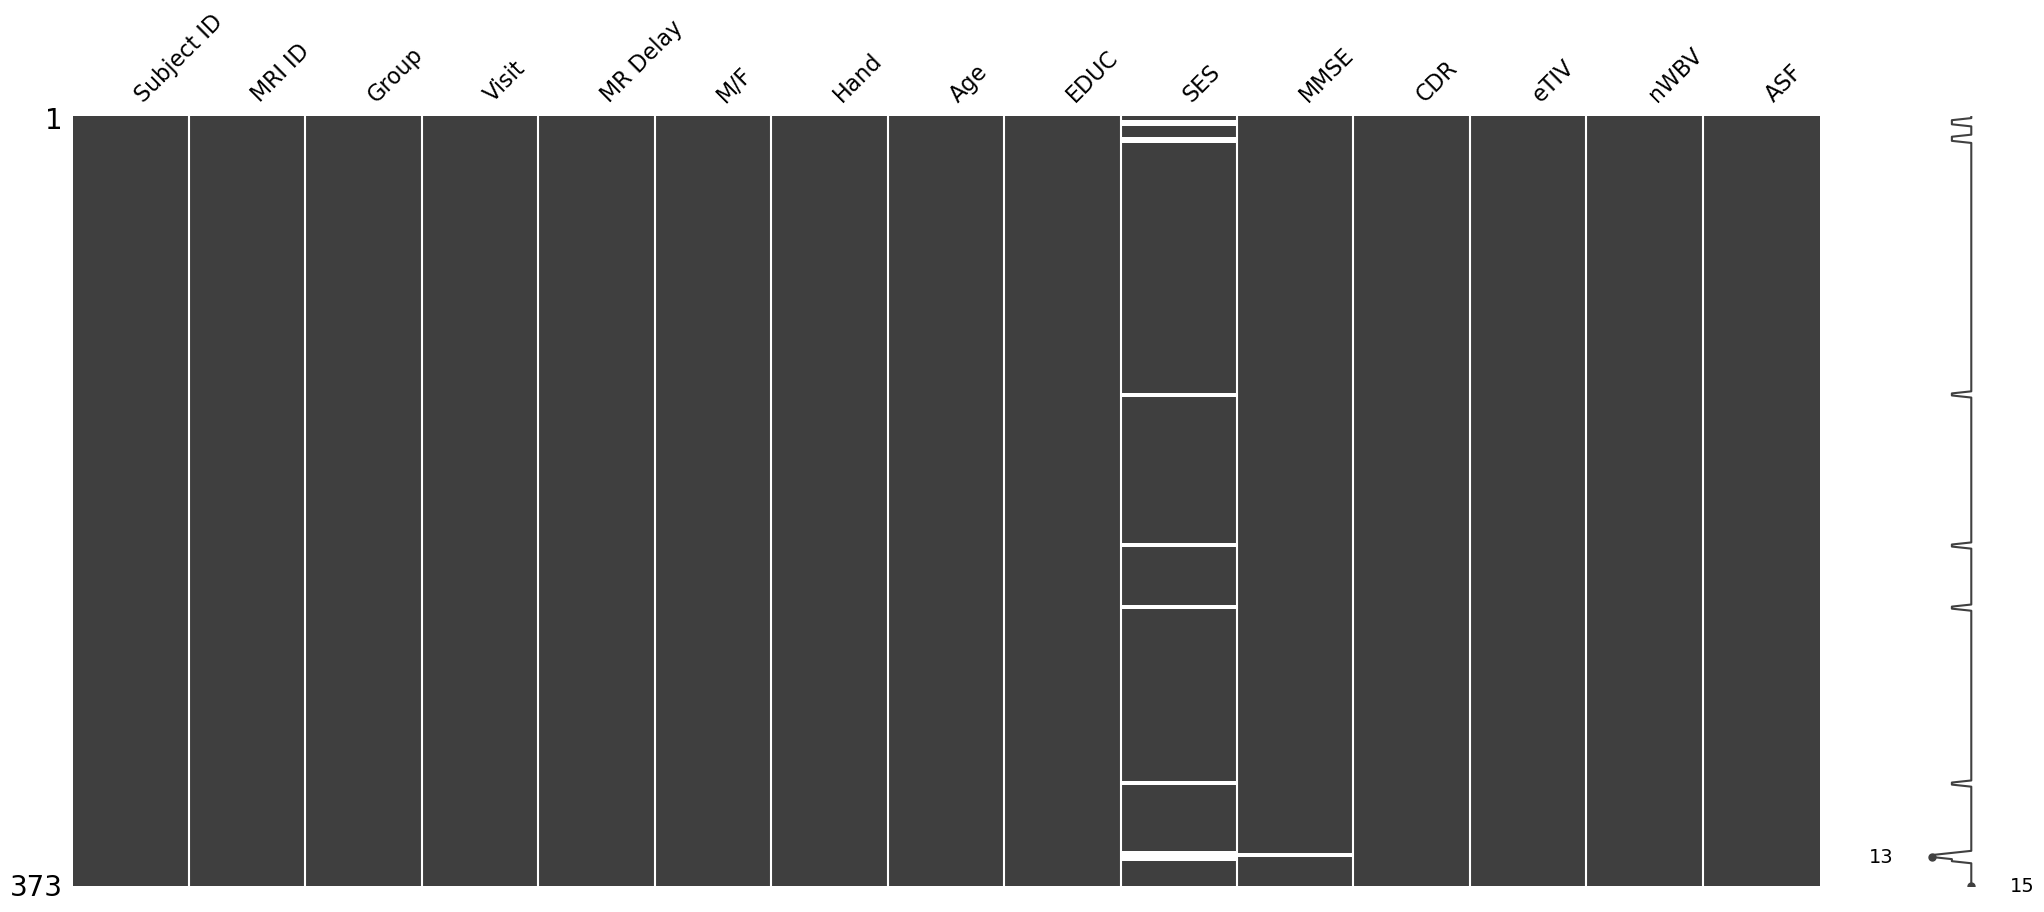

In [7]:
msno.matrix(df)

<AxesSubplot:>

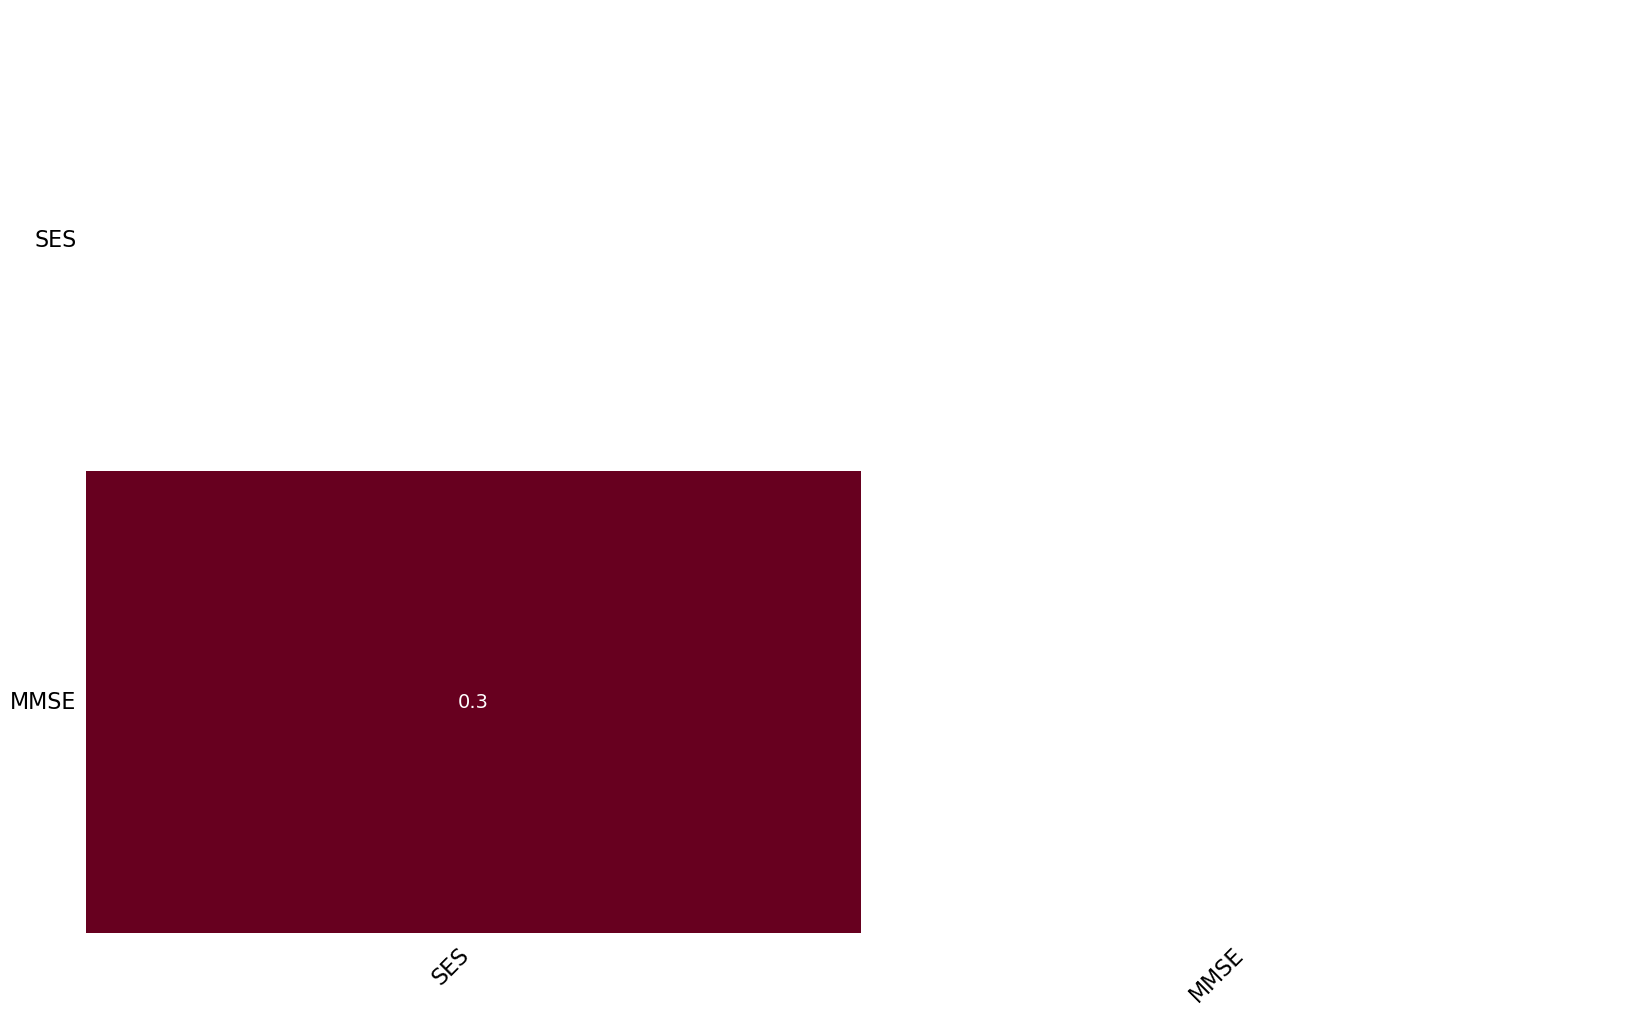

In [8]:
msno.heatmap(df)

In [9]:
df1 = df.fillna(0)
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,0.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Removing Columns

In [10]:
df2 = df1.drop(columns = ['Subject ID','MRI ID'])
df2

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,0.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Converting Categorical Values to Numerical

In [11]:
print(df2['Group'].value_counts())
print(df2['M/F'].value_counts())
print(df2['Hand'].value_counts())

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64
F    213
M    160
Name: M/F, dtype: int64
R    373
Name: Hand, dtype: int64


In [12]:
df2['Group'].replace(['Nondemented','Demented','Converted'],
                    [0,1,2], inplace = True)
df2.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,M,R,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,M,R,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,M,R,80,12,0.0,22.0,0.5,1698,0.701,1.034


In [13]:
df2['M/F'].replace(['M','F'],
                    [0,1], inplace = True)
df2.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,0,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,0,R,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,0,R,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,0,R,80,12,0.0,22.0,0.5,1698,0.701,1.034


In [14]:
df2['Hand'].replace(['R'],
                    [0], inplace = True)
df2.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,0,0,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,0,0,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,0,0,80,12,0.0,22.0,0.5,1698,0.701,1.034


Dataset Correlation

<AxesSubplot:>

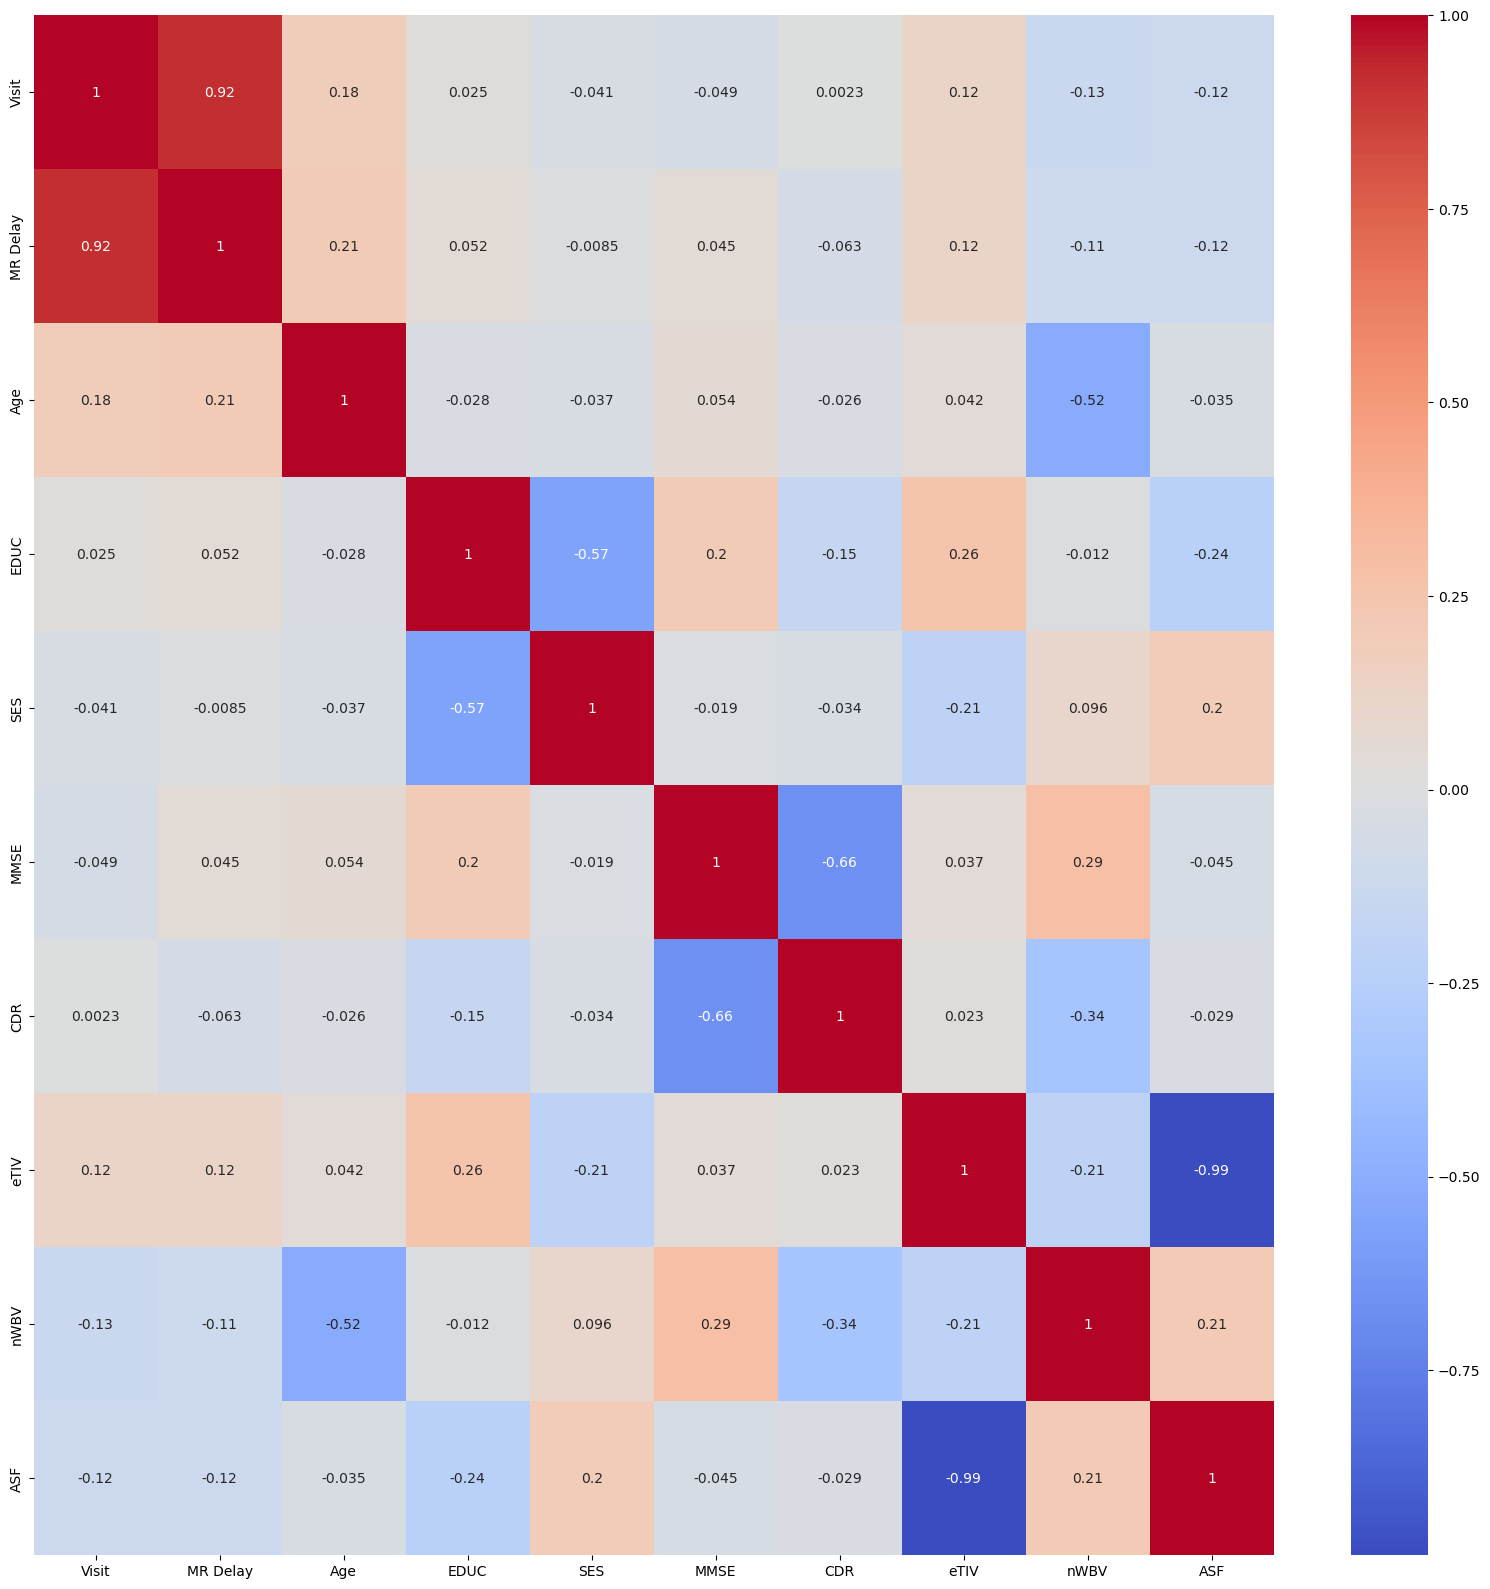

In [15]:
df2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True, cmap = "coolwarm")

Dataset Splitting

In [16]:
y = df2['Group']
y

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: Group, Length: 373, dtype: int64

In [17]:
x = df2.drop(columns = ['Group'])
x

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,0,0,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,2,560,0,0,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,3,1895,0,0,80,12,0.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,0,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,3,2297,0,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,1,0,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,763,1,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [19]:
x_train

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
142,2,451,0,0,68,12,4.0,29.0,0.0,1438,0.738,1.220
298,2,1707,1,0,73,16,3.0,29.0,0.5,1287,0.771,1.364
96,2,486,1,0,78,16,2.0,27.0,0.0,1414,0.727,1.242
321,2,759,1,0,76,14,3.0,28.0,0.5,1236,0.764,1.419
3,2,560,0,0,76,12,0.0,28.0,0.5,1738,0.713,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,0,0,0,70,16,4.0,26.0,0.5,1796,0.742,0.977
359,1,0,0,0,73,12,0.0,23.0,0.5,1661,0.698,1.056
323,2,552,0,0,78,12,0.0,29.0,1.0,1569,0.704,1.119
280,2,636,0,0,75,18,2.0,30.0,0.5,1651,0.737,1.063


In [20]:
x_test

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
161,1,0,1,0,73,8,5.0,25.0,0.5,1151,0.743,1.525
178,2,659,1,0,84,12,4.0,26.0,0.5,1273,0.686,1.378
132,2,723,1,0,81,18,2.0,30.0,0.0,1664,0.677,1.055
98,2,248,0,0,66,16,1.0,21.0,1.0,1708,0.703,1.028
208,2,807,1,0,83,12,0.0,23.0,0.5,1484,0.750,1.183
...,...,...,...,...,...,...,...,...,...,...,...,...
184,2,754,1,0,98,17,1.0,21.0,2.0,1503,0.660,1.168
125,3,764,0,0,80,14,3.0,29.0,0.5,1324,0.695,1.326
365,1,0,1,0,72,16,3.0,24.0,0.5,1354,0.733,1.296
189,1,0,0,0,73,18,2.0,29.0,0.0,1548,0.773,1.134


In [21]:
y_train

142    0
298    2
96     0
321    1
3      1
      ..
343    1
359    1
323    1
280    1
8      0
Name: Group, Length: 298, dtype: int64

In [22]:
y_test

161    1
178    1
132    0
98     1
208    1
      ..
184    1
125    1
365    1
189    0
6      0
Name: Group, Length: 75, dtype: int64

Model Building

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [24]:
y_train_pred = log_model.predict(x_train)
y_test_pred = log_model.predict(x_test)

C:\Users\joeze\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
log_model_train_f1_score = f1_score(y_train, y_train_pred, average='micro') * 100
log_model_train_accuracy_score = accuracy_score(y_train, y_train_pred) * 100
log_model_train_precision_score = precision_score(y_train, y_train_pred, average='micro') * 100
log_model_train_recall_score = recall_score(y_train, y_train_pred, average='micro') * 100
log_model_train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

log_model_test_f1_score = f1_score(y_test, y_test_pred, average='micro') * 100
log_model_test_accuracy_score = accuracy_score(y_test, y_test_pred) * 100
log_model_test_precision_score = precision_score(y_test, y_test_pred, average='micro') * 100
log_model_test_recall_score = recall_score(y_test, y_test_pred, average='micro') * 100
log_model_test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

In [26]:
log_model_results = pd.DataFrame(['Logistic Regression', log_model_train_accuracy_score, log_model_test_accuracy_score, log_model_train_precision_score, log_model_test_precision_score, log_model_train_f1_score, log_model_test_f1_score, log_model_train_recall_score, log_model_test_recall_score, log_model_train_confusion_matrix, log_model_test_confusion_matrix]).transpose()
log_model_results.columns = ['Method', 'Training Accuracy Score', 'Test Accuracy Score', 'Training Precision Score', 'Test Precision Score', 'Training f1 Score', 'Test f1 Score', 'Training Recall Score', 'Test Recall Score', 'Training Confusion Matrix', 'Test Confusion Matrix']
log_model_results

,Method,Training Accuracy Score,Test Accuracy Score,Training Precision Score,Test Precision Score,Training f1 Score,Test f1 Score,Training Recall Score,Test Recall Score,Training Confusion Matrix,Test Confusion Matrix
0,Logistic Regression,49.66443,56.0,49.66443,56.0,49.66443,56.0,49.66443,56.0,"[[148, 0, 0], [116, 0, 0], [34, 0, 0]]","[[42, 0, 0], [30, 0, 0], [3, 0, 0]]"


Hyperparameter Tuning

In [27]:
dt = DecisionTreeClassifier()
dt_paramgrid = {
    'splitter': ["best", "random"],
    'max_depth': [None, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'random_state': list(range(1, 100)),
    'max_features': ["auto", "sqrt", "log2"],
    'class_weight': ["balanced"]
}



In [28]:
warnings.filterwarnings('error', category=FitFailedWarning)

grid_search = GridSearchCV(dt, param_grid=dt_paramgrid, cv=5, error_score='raise')
try:
    grid_search.fit(x_train, y_train)
except FitFailedWarning as e:
    print("Fit failed with error:", e)
except Exception as e:
    print("An unexpected error occurred:", e)

best_dtmodel = grid_search.best_estimator_
best_dtparams = best_dtmodel.get_params()
best_dtmodel.set_params(**best_dtparams)
best_dtmodel.fit(x_train, y_train)
predictions = best_dtmodel.predict(x_test)
dt_accuracy = accuracy_score(y_test, predictions)
dt_precision = precision_score(y_test, predictions, average='micro')

In [29]:
print("Accuracy: ", dt_accuracy*100)
print("Precision: ", dt_precision*100)
print("Hyperparameter Results: ", best_dtparams)

Accuracy:  96.0
Precision:  96.0
Hyperparameter Results:  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 82, 'splitter': 'random'}


In [30]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier())
bc_paramgrid = {
    'base_estimator': [DecisionTreeClassifier()],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'bootstrap_features': [True, False],
    'random_state': [100],
    'oob_score': [True,  False],
    'n_jobs': [-1],
    'verbose': [1,5,10]
}

In [31]:
bc_grid_search = GridSearchCV(bc, param_grid=bc_paramgrid, cv=5, error_score='raise')
try:
    bc_grid_search.fit(x_train, y_train)
except FitFailedWarning as e:
    print("Fit failed with error:", e)
except Exception as e:
    print("An unexpected error occurred:", e)

best_bcmodel = bc_grid_search.best_estimator_
best_bcparams = best_bcmodel.get_params()
best_bcmodel.set_params(**best_bcparams)
best_bcmodel.fit(x_train, y_train)
bc_predictions = best_bcmodel.predict(x_test)
bc_accuracy = accuracy_score(y_test, bc_predictions)
bc_precision = precision_score(y_test, bc_predictions, average='micro')

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    1.9s remaining:    7.7s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parall

[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Pa

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0065s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Batch computation too fast (0.0040s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0075s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0

[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurren

[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurren

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0092s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Batch computation too fast (0.0102s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0045s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Batch computation too fast (0.0141s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Batch computation too fast (0.0140s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=

[Parallel(n_jobs=16)]: Batch computation too fast (0.0056s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 

[Parallel(n_jobs=16)]: Batch computation too fast (0.0125s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0085s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0035s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0085s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0055s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0130s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Batch computation too fast (0.0135s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0065s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:  

[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0140s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Batch computation too fast (0.0143s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parall

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Batch computation too fast (0.0125s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0045s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0140s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0095s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0040s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0040s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0061s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 

[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0145s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0055s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0140s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend w

[Parallel(n_jobs=16)]: Batch computation too fast (0.0130s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0055s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Pa

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Batch computation too fast (0.0061s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed: 

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0136s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parall

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Batch computation too fast (0.0020s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent 

[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0070s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend w

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0040s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Batch computation too fast (0.0142s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Batch computation too fast (0.0145s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Pa

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

[Parallel(n_jobs=16)]: Batch computation too fast (0.0135s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0145s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:  

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Batch computation too fast (0.0080s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0090s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:   

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

[Parallel(n_jobs=16)]: Batch computation too fast (0.0145s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Batch computation too fast (0.0122s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Pa

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Batch computation too fast (0.0045s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0081s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 

[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0040s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0105s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0070s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0150s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Batch computation too fast (0.0155s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Batch computation too fast (0.0040s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.0s remain

[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0

[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0040s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  

[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0085s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  

[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:   

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parall

[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remainin

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:  

[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurren

[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0140s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  

[Parallel(n_jobs=16)]: Batch computation too fast (0.0120s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\joeze\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = pre

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:  

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Usin

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0095s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16

[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.0s
[Pa

[Parallel(n_jobs=16)]: Batch computation too fast (0.0135s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

[Parallel(n_jobs=16)]: Batch computation too fast (0.0141s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   9 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  11 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  13 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Batch computation too fast (0.0050s.) Setting batch_size=2.
[Parallel(n_jobs=16)]: Done   3 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done   7 out of

In [32]:
print("Accuracy: ", bc_accuracy*100)
print("Precision: ", bc_precision*100)
print("Hyperparameter Results: ", best_bcparams)

Accuracy:  97.33333333333334
Precision:  97.33333333333334
Hyperparameter Results:  {'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': True, 'random_state': 100, 'verbose': 1, 'warm_start': False}


Model Evaluation

In [33]:
dtClassifier_params = {
    'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'auto',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'random_state': 82,
    'splitter': 'random'
}
dt_model = DecisionTreeClassifier(**dtClassifier_params)
bgClassifier_params = {
    'base_estimator': dt_model,
    'n_estimators': 50,
    'n_jobs': None,
    'oob_score': False,
    'random_state': 100,
    'verbose': 0,
    'warm_start': False,
    'max_features': 0.7,
    'bootstrap': True,
    'bootstrap_features': False,
    'max_samples': 0.9,
}
bc_model = BaggingClassifier(**bgClassifier_params)

In [34]:
bc_model.fit(x_train, y_train)
bc_model_preds_train = bc_model.predict(x_train)
bc_model_preds_val = bc_model.predict(x_test)

In [35]:
accuracy_train_res = accuracy_score(y_true=y_train, y_pred=bc_model_preds_train)*100
accuracy_test_res = accuracy_score(y_true=y_test, y_pred=bc_model_preds_val)*100
precision_train_res = precision_score(y_true=y_train, y_pred=bc_model_preds_train, average = 'micro')*100
precision_test_res = precision_score(y_true=y_test, y_pred=bc_model_preds_val, average = 'micro')*100
f1_train_res = f1_score(y_true=y_train, y_pred=bc_model_preds_train, average = 'micro')*100
f1_test_res = f1_score(y_true=y_test, y_pred=bc_model_preds_val, average = 'micro')*100
recall_train_res = recall_score(y_true=y_train, y_pred=bc_model_preds_train, average = 'micro')*100
recall_test_res = recall_score(y_true=y_test, y_pred=bc_model_preds_val, average = 'micro')*100
confusion_train_res = confusion_matrix(y_true=y_train, y_pred=bc_model_preds_train)*100
confusion_test_res = confusion_matrix(y_true=y_test, y_pred=bc_model_preds_val)*100

In [36]:
bc_results = pd.DataFrame(['Bagging Classifier', accuracy_train_res, accuracy_test_res, precision_train_res, precision_test_res, f1_train_res, f1_test_res, recall_train_res, recall_test_res, confusion_train_res, confusion_test_res]).transpose()
bc_results.columns = ['Method', 'Training Accuracy Score', 'Test Accuracy Score', 'Training Precision Score', 'Test Precision Score', 'Training f1 Score', 'Test f1 Score', 'Training Recall Score', 'Test Recall Score', 'Training Confusion Matrix', 'Test Confusion Matrix']
bc_results

,Method,Training Accuracy Score,Test Accuracy Score,Training Precision Score,Test Precision Score,Training f1 Score,Test f1 Score,Training Recall Score,Test Recall Score,Training Confusion Matrix,Test Confusion Matrix
0,Bagging Classifier,100.0,97.333333,100.0,97.333333,100.0,97.333333,100.0,97.333333,"[[14800, 0, 0], [0, 11600, 0], [0, 0, 3400]]","[[4200, 0, 0], [0, 3000, 0], [100, 100, 100]]"


Model Comparison

In [37]:
df_models = pd.concat([log_model_results, bc_results], axis = 0)
df_models.reset_index(drop=True)

,Method,Training Accuracy Score,Test Accuracy Score,Training Precision Score,Test Precision Score,Training f1 Score,Test f1 Score,Training Recall Score,Test Recall Score,Training Confusion Matrix,Test Confusion Matrix
0,Logistic Regression,49.66443,56.0,49.66443,56.0,49.66443,56.0,49.66443,56.0,"[[148, 0, 0], [116, 0, 0], [34, 0, 0]]","[[42, 0, 0], [30, 0, 0], [3, 0, 0]]"
1,Bagging Classifier,100.0,97.333333,100.0,97.333333,100.0,97.333333,100.0,97.333333,"[[14800, 0, 0], [0, 11600, 0], [0, 0, 3400]]","[[4200, 0, 0], [0, 3000, 0], [100, 100, 100]]"


Model Visualization

C:\Users\joeze\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


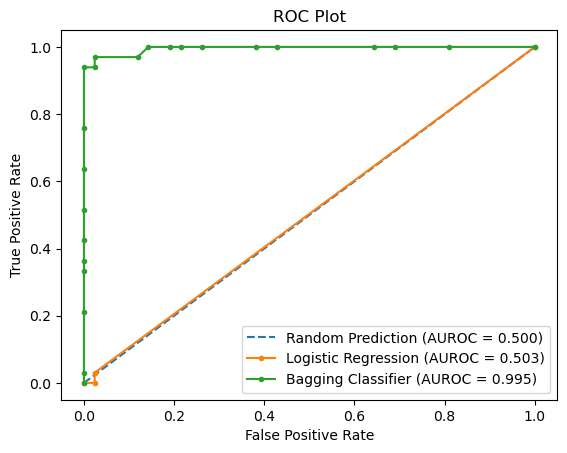

In [38]:
y_test = pd.DataFrame(y_test)
y_test.replace([2], [1], inplace=True)

r_probs = [0 for _ in range(len(y_test))]
log_model_probs = log_model.predict_proba(x_test)
bc_model_probs = bc_model.predict_proba(x_test)

log_model_probs = log_model_probs[:, 1]
bc_model_probs = bc_model_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs, multi_class='ovr')
log_model_auc = roc_auc_score(y_test, log_model_probs)
bc_model_auc = roc_auc_score(y_test, bc_model_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
log_model_fpr, log_model_tpr, _ = roc_curve(y_test, log_model_probs)
bc_model_fpr, bc_model_tpr, _ = roc_curve(y_test, bc_model_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(log_model_fpr, log_model_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % log_model_auc)
plt.plot(bc_model_fpr, bc_model_tpr, marker='.', label='Bagging Classifier (AUROC = %0.3f)' % bc_model_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend()
# Show plot
plt.show()

Model Evaluation

In [39]:
results = pd.DataFrame(x_test.copy())
results['Actual'] = y_test
results['Predicted'] = bc_model.predict(x_test)
results = results[['Actual', 'Predicted']]
results[:50]

,Actual,Predicted
161,1,1
178,1,1
132,0,0
98,1,1
208,1,1
75,1,1
56,0,0
233,1,1
153,0,0
242,0,0
